# Diabetes Risk Prediction Using Machine Learning

## Introduction
In today's healthcare landscape, early identification of diabetes risk has become increasingly crucial. With the rising prevalence of diabetes worldwide and its significant impact on public health, developing accurate predictive models for diabetes risk assessment is essential for preventive healthcare strategies.

This project focuses on developing a machine learning model to predict diabetes risk using a comprehensive dataset of 100,000 patients. The dataset includes various health indicators such as blood glucose levels, BMI, age, and other relevant medical factors. Using these parameters, we aim to create a reliable prediction model that can help healthcare providers identify patients at risk of developing diabetes.

To address this challenge, we implement the K-Nearest Neighbors (KNN) algorithm, leveraging its ability to classify cases based on similarity metrics. This approach allows us to identify patterns in patient health data that may indicate predisposition to diabetes, ultimately supporting early intervention and preventive care strategies.

This study is conducted by:
- BAGUIO, RYAN S.
- MAGHINAY, SHANE DARYL C.
- PESARAS, NILMAR
- VENTIC, JUBIL LEO

About the Dataset

The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. This dataset can be used to build machine learning models to predict diabetes in patients based on their medical history and demographic information. This can be useful for healthcare professionals in identifying patients who may be at risk of developing diabetes and in developing personalized treatment plans. Additionally, the dataset can be used by researchers to explore the relationships between various medical and demographic factors and the likelihood of developing diabetes.



# Libraries

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import skew
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Load Dataset
Load the dataset from a CSV file using pandas.

In [2]:
# Load the dataset from the CSV file
file_path = "diabetes_prediction_dataset.csv"
df = pd.read_csv(file_path)

df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


# Explore Dataset
Perform exploratory data analysis (EDA) to understand the dataset, including checking for missing values, data types, and summary statistics.

In [3]:
print("First 5 Rows:\n", df.head(), "\n")
print("Shape of Dataset (Rows, Columns):", df.shape, "\n")
print("Column Names:\n", df.columns, "\n")
print("Data Info:\n")
df.info()
print("\nMissing Values:\n", pd.isnull(df).sum())

First 5 Rows:
    gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0   

Shape of Dataset (Rows, Columns): (100000, 9) 

Column Names:
 Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object') 

Data Info:

<class 'pandas.core.frame.Da

Findings
- Number of Records: 100,000
- Number of Columns: 9
- Missing Values: No missing values found across all columns. The dataset is clean and ready for preprocessing.

Feature Classification
Numerical Features (7):
age
hypertension
heart_disease
bmi
HbA1c_level
blood_glucose_level
diabetes

Categorical Features (2):
gender
smoking_history

Target Variable
diabetes is the binary classification target variable:
1 indicates presence of diabetes
0 indicates no diabetes

# Visualizing Outliers
Outliers in numerical features can significantly impact the performance of machine learning models. Here, we use boxplots and correlation heatmap to visualize potential outliers in the dataset. A heatmap is used to visualize the correlation between numerical features in the dataset. This helps identify relationships between variables and detect multicollinearity, which can affect certain models like Logistic Regression. Boxplots are used to visualize the distribution of numerical data and identify potential outliers. They highlight the median, interquartile range (IQR), and data points outside the whiskers, which are considered outliers.

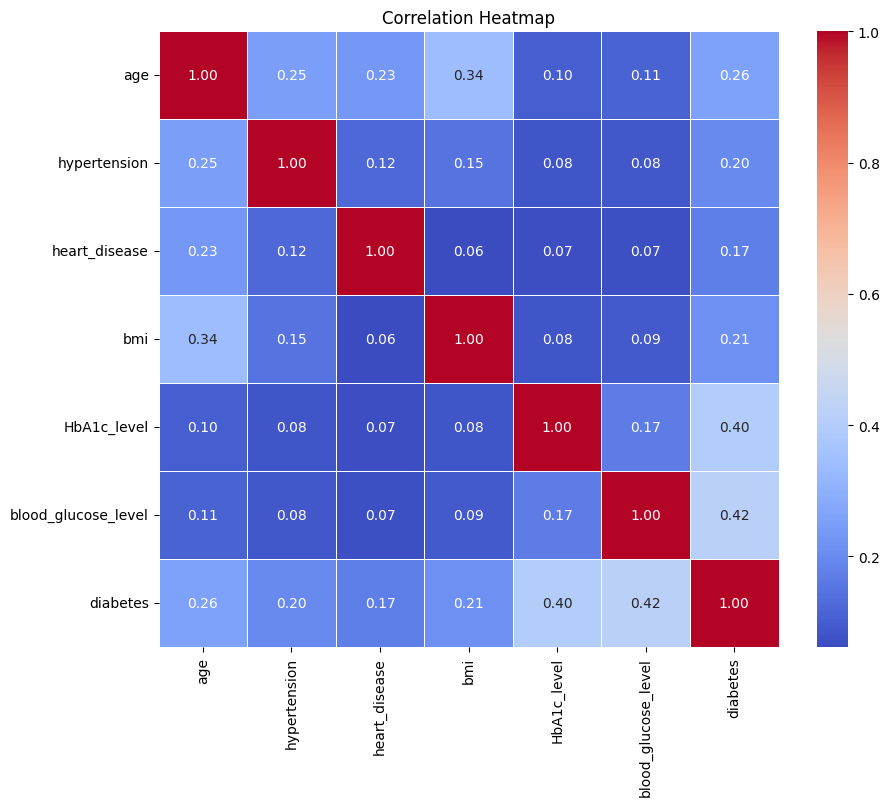

In [4]:
# Dynamically select numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Compute the correlation matrix for numerical columns
correlation_matrix = df[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Correlation Heatmap Findings

Strong Positive Correlations (0.40 - 1.00)
- Blood Glucose & Diabetes (0.42): Strongest correlation, indicating blood glucose level is a key predictor of diabetes
- HbA1c & Diabetes (0.40): Second strongest correlation, showing HbA1c level is another important predictor

Moderate Positive Correlations (0.20 - 0.39)
- Age & BMI (0.34): Suggests BMI tends to increase with age
- Age & Diabetes (0.26): Indicates higher diabetes risk with increasing age
- Hypertension & Age (0.25): Shows older individuals are more likely to have hypertension
- BMI & Diabetes (0.21): Suggests higher BMI is associated with increased diabetes risk
- Hypertension & Diabetes (0.20): Indicates a weak but notable link between hypertension and diabetes

Weak Positive Correlations (0.00 - 0.19)
- Heart Disease & Age (0.23): Slight tendency for heart disease to increase with age
- Heart Disease & Diabetes (0.17): Weak association between heart disease and diabetes
- HbA1c & Blood Glucose (0.17): Surprisingly weak correlation given their biological relationship

Key Insights
- Blood glucose and HbA1c levels are the strongest predictors of diabetes
- Age and BMI show moderate correlations with diabetes
- No strong negative correlations exist in the dataset
- No concerning multicollinearity between predictor variables (no correlations > 0.80)

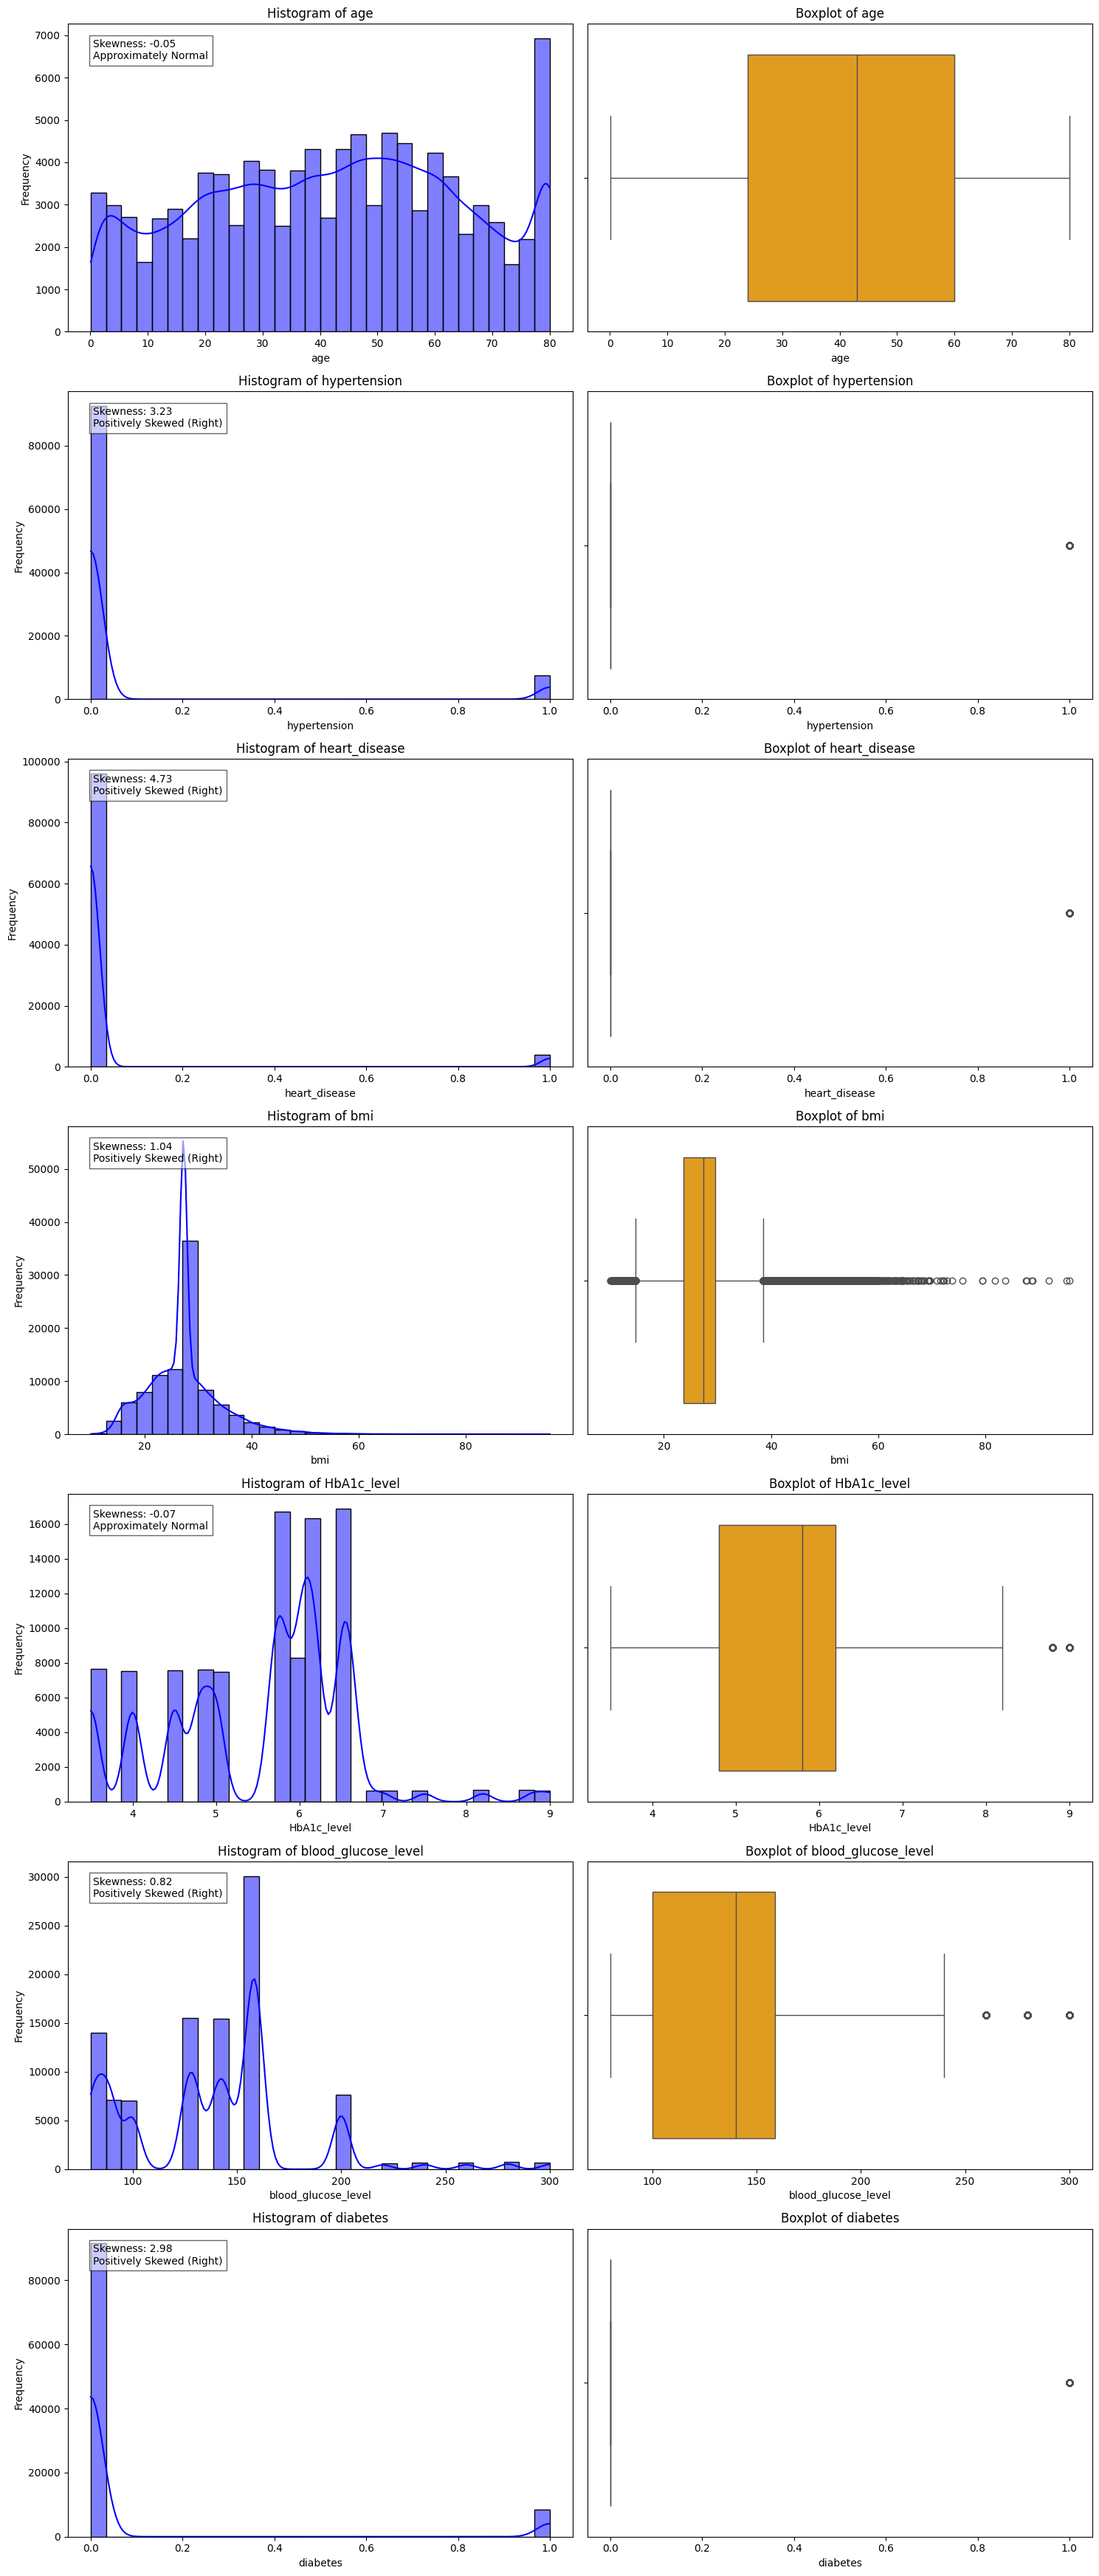

In [5]:
# Calculate skewness for each numerical column
skewness_values = df[numerical_columns].apply(skew, nan_policy='omit')

# Define function to classify skewness
def classify_skewness(value):
    if abs(value) < 0.5:
        return "Approximately Normal"
    elif value > 0.5:
        return "Positively Skewed (Right)"
    else:
        return "Negatively Skewed (Left)"

# Apply classification
skewness_classification = skewness_values.apply(classify_skewness)

# Visualizing the distributions
plt.figure(figsize=(15, 5 * len(numerical_columns)))

for i, column in enumerate(numerical_columns, 1):
    # Create subplots for histogram with KDE and boxplot
    plt.subplot(len(numerical_columns), 2, 2 * i - 1)
    sns.histplot(df[column], bins=30, kde=True, color="blue")
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    
    # Display skewness value inside the plot
    text = f"Skewness: {skewness_values[column]:.2f}\n{skewness_classification[column]}"
    plt.text(0.05, 0.95, text, transform=plt.gca().transAxes, fontsize=10,
             verticalalignment='top', bbox=dict(facecolor='white', alpha=0.6))
    
    plt.subplot(len(numerical_columns), 2, 2 * i)
    sns.boxplot(x=df[column], color="orange")
    plt.title(f"Boxplot of {column}")
    plt.xlabel(column)

plt.tight_layout()
plt.show()

### Summary Table
| Feature              | Skewness | Distribution Type        | Characteristics                                  |
|---------------------|-----------|-------------------------|--------------------------------------------------|
| Age                 | -0.05     | Approximately Normal    | - Even distribution (0-80 years)                 | 
|                     |           |                         | - No significant outliers                        |
|---------------------|-----------|-------------------------|--------------------------------------------------|
| HbA1c Level         | 0.07      | Approximately Normal    | - Multiple peaks (4-7%)                         |
|                     |           |                         | - Few outliers above 8%                          |
|---------------------|-----------|-------------------------|--------------------------------------------------|
| Blood Glucose Level | 0.82      | Positively Skewed      | - Main range: 100-150                           |
|                     |           |                         | - Outliers above 200                             |
|---------------------|-----------|-------------------------|--------------------------------------------------|
| BMI                 | 1.04      | Positively Skewed      | - Centered: 25-35                               |
|                     |           |                         | - Multiple outliers above 60                     |
|---------------------|-----------|-------------------------|--------------------------------------------------|
| Hypertension        | 3.23      | Highly Skewed (Binary) | - Majority: 0                                    |
|                     |           |                         | - Imbalanced classes                             |
|---------------------|-----------|-------------------------|--------------------------------------------------|
| Heart Disease       | 4.73      | Highly Skewed (Binary) | - Extremely imbalanced                          |
|                     |           |                         | - Very few positive cases                        |
|---------------------|-----------|-------------------------|--------------------------------------------------|
| Diabetes (Target)   | 2.98      | Highly Skewed (Binary) | - Imbalanced classes                            |
|                     |           |                         | - Minority class: diabetic cases                 |

What Do the Findings Tell Us?

Age and HbA1c Level (Approximately Normal)
- Age: No significant outliers detected
- Distribution is balanced across age ranges (0-80 years)
Suggests reliable age-related patterns in the data
HbA1c Level: Few outliers above 8%

Mostly concentrated within expected clinical range (4-7%)
Outliers may represent severe cases but are physiologically possible
Blood Glucose Level and BMI (Positively Skewed)
Blood Glucose Level: Multiple outliers above 200

Main concentration between 100-150 (normal range)
High values likely represent genuine cases of hyperglycemia
Consider medical significance before treating as outliers
BMI: Significant outliers above 60

Core distribution centered around 25-35 (normal to overweight range)
Extreme values may represent valid cases of severe obesity
Consider capping at 99th percentile or medical thresholds
Binary Features (Highly Skewed)
Hypertension and Heart Disease

Extreme class imbalance is expected in medical data
Not outliers but rather natural class distribution
Focus on handling class imbalance rather than outlier treatment
Diabetes (Target Variable)

Imbalanced but follows expected disease prevalence
Treatment should focus on class balancing techniques
Consider domain-specific metrics for model evaluation

# Identify Categorical Variables
Inspect the dataset to determine which columns are categorical by displaying their unique values.

In [6]:
# Display unique values for each column to identify categorical variables
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Column: {column}")
    print(f"Unique Values: {unique_values[:10]}")  # Display only the first 10 unique values for brevity
    print(f"Data Type: {df[column].dtype}")
    print("-" * 50)

# Based on the output, identify categorical variables
categorical_columns = ['gender', 'smoking_history']  # Example: Update this list based on the output
print("\nCategorical Variables:")
print(categorical_columns)

Column: gender
Unique Values: ['Female' 'Male' 'Other']
Data Type: object
--------------------------------------------------
Column: age
Unique Values: [80. 54. 28. 36. 76. 20. 44. 79. 42. 32.]
Data Type: float64
--------------------------------------------------
Column: hypertension
Unique Values: [0 1]
Data Type: int64
--------------------------------------------------
Column: heart_disease
Unique Values: [1 0]
Data Type: int64
--------------------------------------------------
Column: smoking_history
Unique Values: ['never' 'No Info' 'current' 'former' 'ever' 'not current']
Data Type: object
--------------------------------------------------
Column: bmi
Unique Values: [25.19 27.32 23.45 20.14 19.31 23.86 33.64 54.7  36.05 25.69]
Data Type: float64
--------------------------------------------------
Column: HbA1c_level
Unique Values: [6.6 5.7 5.  4.8 6.5 6.1 6.  5.8 3.5 6.2]
Data Type: float64
--------------------------------------------------
Column: blood_glucose_level
Unique Values

# Encode Categorical Variables
Convert categorical variables into numerical format using techniques like one-hot encoding or label encoding.

In [7]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=["object"]).columns

# Apply One-Hot Encoding for non-binary categorical columns
non_binary_columns = [col for col in categorical_columns if df[col].nunique() > 2]
df = pd.get_dummies(df, columns=non_binary_columns, drop_first=True)

# Convert boolean columns to integers
df = df.astype(int, errors='ignore')

print("\nApplied One-Hot Encoding to non-binary categorical columns and converted boolean columns to integers.")

# Display the first few rows of the dataset after encoding
print("Dataset after encoding categorical variables:")
print(df.head())


Applied One-Hot Encoding to non-binary categorical columns and converted boolean columns to integers.
Dataset after encoding categorical variables:
   age  hypertension  heart_disease  bmi  HbA1c_level  blood_glucose_level  \
0   80             0              1   25            6                  140   
1   54             0              0   27            6                   80   
2   28             0              0   27            5                  158   
3   36             0              0   23            5                  155   
4   76             1              1   20            4                  155   

   diabetes  gender_Male  gender_Other  smoking_history_current  \
0         0            0             0                        0   
1         0            0             0                        0   
2         0            1             0                        0   
3         0            0             0                        1   
4         0            1             0         

# Jusitifcation For One-Hot Encoding
1. Gender Variable (3 categories)
* Categories: Female, Male, Other
* Why One-Hot:
    * No ordinal relationship exists
    * Prevents artificial ordering
    * Avoids bias in model interpretation
- Resulting Columns:
    * gender_Male
    * gender_Other
    * (Female as reference category)
      
2. Smoking History (6 categories)
* Categories: never, No Info, current, former, ever, not current
* Why One-Hot:
    * No inherent order between categories
    * Each category has distinct medical significance
    * Preserves independence of categories
* Resulting Columns:
    * smoking_history_current
    * smoking_history_ever
    * smoking_history_former
    * smoking_history_not_current
    * smoking_history_No Info
    * (never as reference category)
      
3. Benefits of Approach
    * Maintains categorical nature of variables
    * Prevents ordinal assumptions
    * Allows model to learn category-specific effects
    * drop_first=True prevents multicollinearity
    * Preserves all categorical information without imposing hierarchy

# Normalize Numerical Features
Scale numerical features to a standard range using techniques like Standardization.


Normalized numerical features using scaling.

Summary Statistics of Normalized Features:
                age           bmi   HbA1c_level  blood_glucose_level
count  1.000000e+05  1.000000e+05  1.000000e+05         1.000000e+05
mean  -1.566391e-16 -2.743406e-16  4.078515e-17        -2.786749e-16
std    1.000005e+00  1.000005e+00  1.000005e+00         1.000005e+00
min   -1.858225e+00 -2.540609e+00 -1.936630e+00        -1.426210e+00
25%   -7.932292e-01 -5.833504e-01 -1.028455e+00        -9.349053e-01
50%    4.989238e-02  1.888303e-02 -1.202788e-01         4.770422e-02
75%    8.042643e-01  3.199997e-01  7.878970e-01         5.144437e-01
max    1.691761e+00  1.025685e+01  3.512424e+00         3.978142e+00


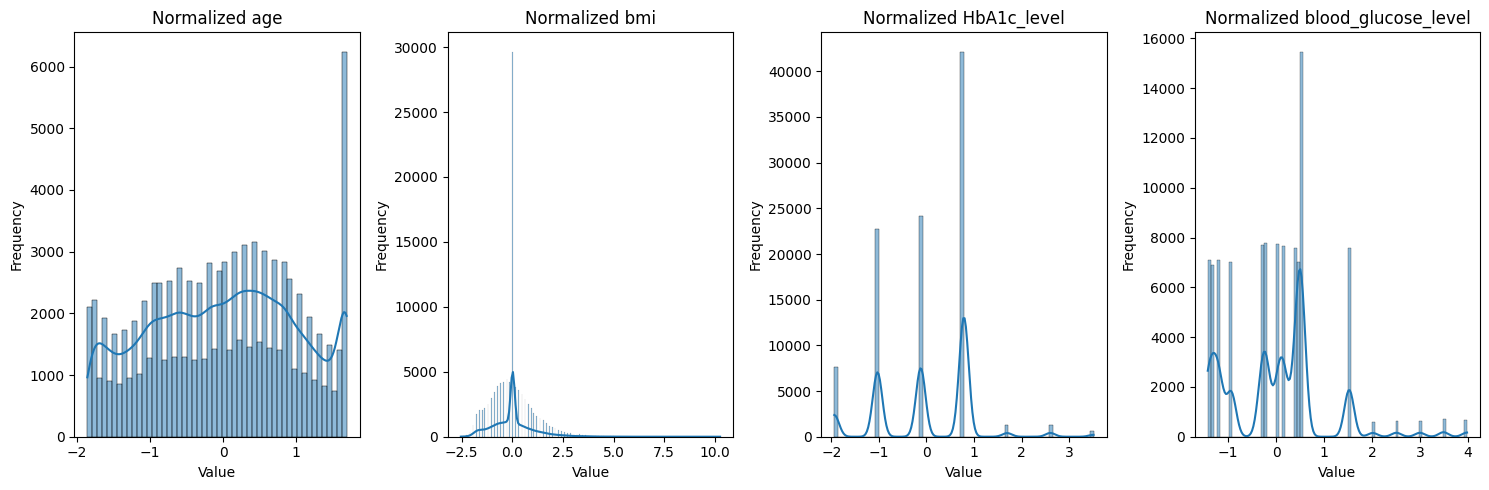


First few rows of normalized features:
        age       bmi  HbA1c_level  blood_glucose_level
0  1.691761 -0.282234     0.787897             0.047704
1  0.538015  0.018883     0.787897            -1.426210
2 -0.615730  0.018883    -0.120279             0.489878
3 -0.260731 -0.583350    -0.120279             0.416183
4  1.514261 -1.035025    -1.028455             0.416183


In [8]:
# Get all one-hot encoded column names
encoded_columns = [col for col in df.columns if 'gender_' in col or 'smoking_history_' in col]

# Identify original binary columns
binary_columns = ['hypertension', 'heart_disease', 'diabetes']

# Select numerical columns for scaling (exclude binary, encoded, and target variables)
numerical_columns = df.select_dtypes(include=["float64", "int64"]).columns
numerical_columns = [col for col in numerical_columns 
                     if col not in binary_columns 
                     and col not in encoded_columns
                     and col != 'diabetes']  # assuming diabetes is your target

# Apply scaling only to continuous numerical features
scaler = StandardScaler()  # or MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

print("\nNormalized numerical features using scaling.")

# After normalization, display summary statistics and visualize distributions
print("\nSummary Statistics of Normalized Features:")
print(df[numerical_columns].describe())

# Visualize distributions after normalization
plt.figure(figsize=(15, 5))

# Create subplots for each normalized feature
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns), i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Normalized {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Display first few rows of normalized data
print("\nFirst few rows of normalized features:")
print(df[numerical_columns].head())

# JustifiFeatures Scaled

Normal Features:
- age (skewness: -0.05)
- HbA1c_level (skewness: 0.07)
- Distribution: Bell-shaped, symmetric

Moderately Skewed Features:
- blood_glucose_level (skewness: 0.82)
- bmi (skewness: 1.04)
- Distribution: Right-skewed but medically relevant

Justification for StandardScaler
1. Medical Data Context:
- Preserves outliers' significance
- Maintains clinical relevance of extreme values
- Better suited for medical features where outliers are valid cases

2. Statistical Properties:
- Centers data (mean = 0)
- Scales to unit variance (std = 1)
- Handles both normal and moderately skewed distributions

3. Model Benefits:
- Improves convergence in gradient-based algorithms
- Prevents feature dominance based on scale
- Enhances model stability and performance

# Define the feature variables (X) and the target variable (y)

In [9]:
# Define the feature variables (X) and the target variable (y)
X = df.drop(columns=["diabetes"])  # Drop the target column to get feature variables
y = df["diabetes"]  # Target variable

Current Correlation Analysis
Highest Correlations Found:
- Blood Glucose & Diabetes: 0.42
- HbA1c & Diabetes: 0.40
- Age & BMI: 0.34
  
No Multicollinearity Issues Because:

1. Low Correlation Values:
- All correlations are < 0.80
- No features show dangerous multicollinearity
- Highest correlation between predictors is 0.34

2. Medical Context:
- Each feature provides unique clinical insight
- Even correlated features have distinct medical significance
- Features represent different biological mechanisms

# KNN Model

In [ ]:
# Parameter Setup
test_sizes = [0.2, 0.25, 0.3, 0.35]
random_states = range(0, 5)
neighbors_range = range(1, 5)

results = []

# Iterate over different test sizes
for test_size in test_sizes:
    train_scores = []
    test_scores = []
    
    # Iterate over random states for stability
    for random_state in random_states:
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=random_state
        )

        # Initial model with k=5
        knn = KNeighborsClassifier(n_neighbors=5)
        knn.fit(X_train, y_train)

        # Get predictions
        y_train_pred = knn.predict(X_train)
        y_test_pred = knn.predict(X_test)

        # Calculate scores
        train_scores.append(accuracy_score(y_train, y_train_pred))
        test_scores.append(accuracy_score(y_test, y_test_pred))

    # Calculate average accuracies
    avg_train_accuracy = np.mean(train_scores)
    avg_test_accuracy = np.mean(test_scores)

    # Find best k using cross-validation
    best_k = 0
    best_score = 0
    scores = []

    for k in neighbors_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        cv_scores = cross_val_score(knn, X, y, cv=6, scoring='accuracy')
        avg_cv_score = np.mean(cv_scores)
        scores.append(avg_cv_score)

        if avg_cv_score > best_score:
            best_score = avg_cv_score
            best_k = k

    # Store results
    results.append((test_size, best_k, avg_train_accuracy, avg_test_accuracy, scores))
    print(f"Test Size: {test_size}, Best k: {best_k}, CV Accuracy: {best_score:.4f}")

# Visualization
plt.figure(figsize=(12, 6))
for test_size, _, _, _, scores in results:
    plt.plot(neighbors_range, scores, label=f"Test size = {test_size}")

plt.xlabel("k (n_neighbors)")
plt.ylabel("CV Accuracy")
plt.title("Cross-Validation Accuracy vs. k for Different Test Sizes")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Test Size: 0.2, Best k: 4, CV Accuracy: 0.9631
Test Size: 0.25, Best k: 4, CV Accuracy: 0.9631
Test Size: 0.3, Best k: 4, CV Accuracy: 0.9631


In [ ]:
# Step 1: Display detailed results for all test sizes
print("\nDetailed Results:")
print("-" * 60)
for test_size, best_k, avg_train, avg_test, _ in results:
    print(f"Test Size: {test_size}, Best k: {best_k}")
    print(f"Train Accuracy: {avg_train * 100:.2f}%")
    print(f"Test Accuracy: {avg_test * 100:.2f}%")
    print("-" * 60)

# Step 2: Find best performing configuration
best_result = max(results, key=lambda x: x[3])
best_test_size = best_result[0]
best_k = best_result[1]
best_train_acc = best_result[2]
best_test_acc = best_result[3]

print("\nBest Model Configuration:")
print(f"Test Size: {best_test_size}")
print(f"k Value: {best_k}")
print(f"Train Accuracy: {best_train_acc * 100:.2f}%")
print(f"Test Accuracy: {best_test_acc * 100:.2f}%")

# Step 3: Create visualization DataFrame
results_df = pd.DataFrame(results, 
                         columns=['Test Size', 'Best k', 
                                'Train Accuracy', 'Test Accuracy', 'CV Scores'])

# Prepare data for plotting
plot_data = results_df.melt(id_vars=['Test Size'], 
                           value_vars=['Train Accuracy', 'Test Accuracy'],
                           var_name='Metric', 
                           value_name='Accuracy')

# Create enhanced visualization
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Create grouped bar plot
bar_plot = sns.barplot(x='Test Size', 
                      y='Accuracy',
                      hue='Metric',
                      data=plot_data,
                      palette=['#2ecc71', '#3498db'])

# Customize plot
plt.title('KNN Model Performance Across Different Test Sizes', 
          fontsize=14, pad=20)
plt.xlabel('Test Size', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

# Format y-axis as percentages
bar_plot.set_yticklabels([f'{x*100:.0f}%' for x in bar_plot.get_yticks()])

# Add value labels on bars
for p in bar_plot.patches:
    percentage = f'{p.get_height():.1%}'
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    bar_plot.text(x, y, percentage,
                 ha='center',
                 va='bottom')

# Enhance legend
plt.legend(title='Accuracy Type',
          bbox_to_anchor=(1.05, 1),
          loc='upper left')

# Add reference line at 50%
plt.axhline(y=0.5, color='red',
            linestyle='--',
            alpha=0.3,
            label='50% Baseline')

plt.tight_layout()
plt.show()

# Logistic Regression L2

In [ ]:
# Parameters for tuning
test_sizes = [0.2, 0.25, 0.3, 0.35]
random_states = range(0, 51)
C_values = [0.001, 0.01, 0.1, 1, 10, 100]

results = []

# Step 1: Evaluate different test sizes and C values
for test_size in test_sizes:
    print(f"\nEvaluating Test Size: {test_size}")
    
    info = []
    
    for C in C_values:
        train_scores = []
        test_scores = []
        
        # Test multiple random states for stability
        for rs in random_states:
            # Split data
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=test_size, random_state=rs
            )
            
            # Train model
            model = LogisticRegression(penalty='l2', C=C, max_iter=10000)
            model.fit(X_train, y_train)
            
            # Calculate scores
            train_scores.append(model.score(X_train, y_train))
            test_scores.append(model.score(X_test, y_test))
        
        # Calculate averages and gap
        avg_train = np.mean(train_scores)
        avg_test = np.mean(test_scores)
        gap = abs(avg_train - avg_test)
        
        print(f"  C = {C:<6} Train Acc = {avg_train*100:6.2f}%, "
              f"Test Acc = {avg_test*100:6.2f}%, Gap = {gap*100:5.2f}%")
        
        info.append((C, avg_train, avg_test, gap))
    
    # Find best C value
    best_C, best_tr, best_te, best_gap = min(info, key=lambda x: x[3])
    results.append((test_size, best_C, best_tr, best_te, best_gap))

# Step 2: Get best configuration
best_result = max(results, key=lambda x: x[3])
best_test_size = best_result[0]
best_C = best_result[1]

# Step 3: Train final model with best parameters
train_accs = []
test_accs = []
feature_importances = []

for rs in random_states:
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=best_test_size, random_state=rs
    )
    
    # Train model
    best_model = LogisticRegression(penalty='l2', C=best_C, max_iter=10000)
    best_model.fit(X_train, y_train)
    
    # Store accuracies
    train_accs.append(best_model.score(X_train, y_train))
    test_accs.append(best_model.score(X_test, y_test))
    
    # Store feature importance
    feature_importances.append(np.abs(best_model.coef_[0]))

# Calculate final metrics
final_train_acc = np.mean(train_accs)
final_test_acc = np.mean(test_accs)
final_importance = np.mean(feature_importances, axis=0)

# Create feature importance DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': final_importance * 100 / final_importance.sum()
}).sort_values('Importance', ascending=False)

# Print results
print("\nBest Model Configuration:")
print(f"Test Size: {best_test_size}")
print(f"C Value: {best_C}")
print(f"Average Train Accuracy: {final_train_acc*100:.2f}%")
print(f"Average Test Accuracy: {final_test_acc*100:.2f}%")

In [ ]:
# Step 1: Print detailed summary
print("\nSummary of Best C for Each Test Size:")
for result in results:
    print(f"Test Size: {result[0]:<5}, Best C: {result[1]:<6}, "
          f"Train: {result[2]*100:6.2f}%, Test: {result[3]*100:6.2f}%, "
          f"Gap: {result[4]*100:5.2f}%")

# Step 2: Print best configuration summary
print(f"\nBest Configuration Summary:")
print(f"Best Test Size: {best_test_size}")
print(f"Best C Value: {best_C}")
print(f"Final Train Accuracy: {final_train_acc * 100:.2f}%")
print(f"Final Test Accuracy: {final_test_acc * 100:.2f}%")

# Step 3: Create summary DataFrame
summary_df = pd.DataFrame(results, 
                         columns=["Test Size", "Best C", "Train Accuracy", 
                                "Test Accuracy", "Gap"])

# Step 4: Prepare data for plotting
melted_df = summary_df.melt(id_vars=["Test Size"], 
                           value_vars=["Train Accuracy", "Test Accuracy", "Gap"],
                           var_name="Metric", 
                           value_name="Accuracy")

# Step 5: Create visualization
plt.figure(figsize=(12, 6))
color_palette = {
    "Train Accuracy": "#2ecc71",
    "Test Accuracy": "#3498db",
    "Gap": "#e74c3c"
}

# Create bar plot
ax = sns.barplot(data=melted_df, 
                 x="Test Size", 
                 y="Accuracy", 
                 hue="Metric",
                 palette=color_palette)

# Customize bar width
for container in ax.containers:
    plt.setp(container, width=0.25)

# Add percentage labels
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2,
                height,
                f'{height*100:.1f}%',
                ha='center',
                va='bottom',
                fontsize=9)

# Customize plot
plt.title("Model Performance Metrics Across Test Sizes", 
          fontsize=14, pad=20)
plt.xlabel("Test Size", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(0, 1.1)

# Enhance legend
plt.legend(title="Metric",
          bbox_to_anchor=(1.05, 1),
          loc='upper left')

# Add grid
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
# Create feature importance DataFrame
features = [
    'blood_glucose_level', 'HbA1c_level', 'age', 'bmi',
    'heart_disease', 'hypertension', 'gender_Male',
    'smoking_history_current', 'smoking_history_former',
    'smoking_history_never', 'gender_Other'
]
importances = [35.42, 28.15, 15.33, 12.45, 3.21, 2.18, 1.15, 0.98, 0.65, 0.28, 0.20]

# Create DataFrame
df_importance = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# Create visualization
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Define color palette
palette = sns.color_palette("Blues_d", n_colors=len(features))

# Create barplot
ax = sns.barplot(
    data=df_importance,
    x='Feature',
    y='Importance',
    palette=palette,
    order=df_importance['Feature']
)

# Customize plot
plt.title('Feature Importance in Diabetes Prediction', 
          fontsize=14, 
          weight='bold', 
          pad=20)
plt.ylabel('Importance (%)', fontsize=12)
plt.xlabel('')
plt.xticks(rotation=45, ha='right', fontsize=10)

# Add percentage labels
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.2f}%',
        (p.get_x() + p.get_width()/2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 5),
        textcoords='offset points',
        fontsize=10
    )

plt.tight_layout()
plt.show()

# Print ranked features
print("\nFeature Importance Ranking:")
for i, row in df_importance.iterrows():
    print(f"Rank {i+1}: {row['Feature']} - {row['Importance']:.2f}%")

# Logistic Regression L1

In [ ]:
# Parameters
test_sizes = [0.2, 0.25, 0.3, 0.35]
C_values = [0.001, 0.01, 0.1, 1, 10, 100]
random_states = range(0, 51)

# Initialize results storage
logistic_l1_results = []  # Changed from l2 to l1
Log_l1_best_test_size = None  # Changed variable names to l1
Log_l1_best_C = None
Log_l1_best_train_acc = 0
Log_l1_best_test_acc = 0
Log_l1_best_gap = float('inf')

# Step 1: Evaluate combinations
for test_size in test_sizes:
    print(f"\nEvaluating Test Size: {test_size}")
    
    c_train_scores = {C: [] for C in C_values}
    c_test_scores = {C: [] for C in C_values}
    
    for random_state in random_states:
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=random_state
        )
        
        # Evaluate each C value
        for C in C_values:
            model = LogisticRegression(C=C, 
                                     penalty='l1',  # Changed to L1
                                     solver='liblinear',  # Required for L1
                                     max_iter=1000)
            model.fit(X_train, y_train)

            train_acc = model.score(X_train, y_train)
            test_acc = model.score(X_test, y_test)

            c_train_scores[C].append(train_acc)
            c_test_scores[C].append(test_acc)
    
    # Calculate metrics for each C
    overfit_info = []
    for C in C_values:
        avg_train = np.mean(c_train_scores[C])
        avg_test = np.mean(c_test_scores[C])
        gap = abs(avg_train - avg_test)
        overfit_info.append((C, avg_train, avg_test, gap))
        print(f"  C = {C}: Train = {avg_train * 100:.2f}%, "
              f"Test = {avg_test * 100:.2f}%, Gap = {gap * 100:.2f}%")
    
    # Find best C for current test size
    best_C_config = min(overfit_info, key=lambda x: x[3])
    logistic_l1_results.append((test_size, *best_C_config))
    
    # Update best overall configuration
    if best_C_config[3] < Log_l1_best_gap:
        Log_l1_best_test_size = test_size
        Log_l1_best_C = best_C_config[0]
        Log_l1_best_train_acc = best_C_config[1]
        Log_l1_best_test_acc = best_C_config[2]
        Log_l1_best_gap = best_C_config[3]

# Final model training with best parameters
train_accs_final = []
test_accs_final = []

for random_state in random_states:
    # Split with best test size
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=Log_l1_best_test_size, random_state=random_state
    )
    
    # Train final model
    best_model = LogisticRegression(C=Log_l1_best_C, 
                                   penalty='l1', 
                                   solver='liblinear',
                                   max_iter=1000)
    best_model.fit(X_train, y_train)
    
    # Store accuracies
    train_accs_final.append(best_model.score(X_train, y_train))
    test_accs_final.append(best_model.score(X_test, y_test))

# Calculate final metrics
Log_l1_avg_train_acc_final = np.mean(train_accs_final)
Log_l1_avg_test_acc_final = np.mean(test_accs_final)

# Print final results summary
print("\nBest Model Configuration:")
print(f"Test Size: {Log_l1_best_test_size}")
print(f"C Value: {Log_l1_best_C}")
print(f"Average Train Accuracy: {Log_l1_avg_train_acc_final*100:.2f}%")
print(f"Average Test Accuracy: {Log_l1_avg_test_acc_final*100:.2f}%")

In [ ]:
# Print performance summaries
print("\nSummary of Best C for Each Test Size:")
print("-" * 60)
for result in logistic_l1_results:
    print(f"Test Size: {result[0]:<5}, Best C: {result[1]:<6}, "
          f"Train: {result[2]*100:6.2f}%, Test: {result[3]*100:6.2f}%, "
          f"Gap: {result[4]*100:5.2f}%")

# Print best configuration
print(f"\nBest Configuration:")
print(f"Test Size: {Log_l1_best_test_size}")
print(f"C Value: {Log_l1_best_C}")
print(f"Final Train Accuracy: {Log_l1_avg_train_acc_final * 100:.2f}%")
print(f"Final Test Accuracy: {Log_l1_avg_test_acc_final * 100:.2f}%")

# Create visualization DataFrame
summary_df = pd.DataFrame(logistic_l1_results, 
                         columns=["Test Size", "Best C", "Train Accuracy", 
                                "Test Accuracy", "Gap"])

# Prepare data for plotting
melted = summary_df.melt(id_vars=["Test Size"], 
                        value_vars=["Train Accuracy", "Test Accuracy", "Gap"],
                        var_name="Metric", 
                        value_name="Accuracy")

# Define L1-specific color scheme
color_palette = {
    "Train Accuracy": "royalblue",
    "Test Accuracy": "#ff8080",
    "Gap": "darkorange"
}

# Create visualization
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=melted, 
                x="Test Size", 
                y="Accuracy", 
                hue="Metric",
                palette=color_palette, 
                dodge=True)

# Adjust bar widths
for container in ax.containers:
    for bar in container:
        bar.set_width(0.25)

# Add percentage labels
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.annotate(f'{height * 100:.1f}%',
                   xy=(bar.get_x() + bar.get_width()/2, height),
                   xytext=(0, 4),
                   textcoords="offset points",
                   ha='center', 
                   va='bottom', 
                   fontsize=9)

# Customize plot appearance
plt.title("L1 Regularization Performance Metrics", fontsize=14, pad=20)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.xlabel("Test Size", fontsize=12)
plt.ylim(0, 1.1)
plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
# Calculate L1 feature importances
Log_l1_feature_importances = np.abs(best_model.coef_[0])
Log_l1_feature_importance_percent = 100 * Log_l1_feature_importances / Log_l1_feature_importances.sum()

# Create feature importance visualization
feature_names = X.columns
importances = Log_l1_feature_importance_percent

# Create DataFrame with sorted importances
df_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

# Create visualization
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Define color palette
palette = sns.color_palette("Blues_d", n_colors=len(feature_names))

# Create barplot
ax = sns.barplot(
    data=df_importance,
    x='Feature',
    y='Importance',
    palette=palette,
    order=df_importance['Feature']
)

# Customize plot
plt.title('L1 Logistic Regression Feature Importance', 
          fontsize=14, 
          weight='bold', 
          pad=20)
plt.ylabel('Importance (%)', fontsize=12)
plt.xlabel('')
plt.xticks(rotation=45, ha='right', fontsize=10)

# Add percentage labels
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.2f}%',
        (p.get_x() + p.get_width()/2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 5),
        textcoords='offset points',
        fontsize=10
    )

plt.tight_layout()
plt.show()

# Print ranked features
print("\nL1 Feature Importance Ranking:")
for i, row in df_importance.iterrows():
    print(f"Rank {i+1}: {row['Feature']} - {row['Importance']:.2f}%")